# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## 1. Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import seaborn
import numpy as np
import matplotlib.pyplot as plt

from joblib import dump
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer 
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

RANDOMSTATE = 12345

Подключил библиотеки.

### 1.1 Откройте файлы и изучите их

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
data_test = pd.read_csv('/gold_recovery_test_new.csv', index_col='date')
data_full = pd.read_csv('/gold_recovery_full_new.csv', index_col='date')

Загрузил данные.

In [3]:
print('data_train ##############################')
display(data_train.head(3))
print()
print('data_test ##############################')
display(data_test.head(3))
print()
print('data_full ##############################')
display(data_full.head(3))

data_train ##############################


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363



data_test ##############################


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559



data_full ##############################


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


Просмотрел первые 3 значений в каждой таблице.

In [4]:
print('data_train ##############################')
print(data_train.shape)
print()
print('data_test ##############################')
print(data_test.shape)
print()
print('data_full ##############################')
print(data_full.shape)

data_train ##############################
(14149, 86)

data_test ##############################
(5290, 52)

data_full ##############################
(19439, 86)


Просмотрел информацию о количестве наблюдений и признаков в каждой таблице, делаю вывод, что **data_full** была разделена на обучающую и тестовую выборку в пропорции 72:28%.  
В выборке **data_test** отсутствуют признаки. Необходимо далее проверить почему они отсутствуют и обработать выборку.

In [5]:
print('data_train ##############################')
print(data_train.columns)
print()
print('data_test ##############################')
print(data_test.columns)
print()
print('data_full ##############################')
print(data_full.columns)

data_train ##############################
Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatban

Вывел названия столбцов и проверил их.

In [6]:
print('data_train ##############################')
print('Количество дубликатов', data_train.duplicated().sum())
print()
print('data_test ##############################')
print('Количество дубликатов', data_test.duplicated().sum())
print()
print('data_full ##############################')
print('Количество дубликатов', data_full.duplicated().sum())

data_train ##############################
Количество дубликатов 0

data_test ##############################
Количество дубликатов 0

data_full ##############################
Количество дубликатов 0


Проверил количество явных дубликатов.

In [7]:
print('data_train ##############################')
print('Количество пропущенных значений',data_train.isna().sum())
print()
print('data_test ##############################')
print('Количество пропущенных значений', data_test.isna().sum())
print()
print('data_full ##############################')
print('Количество пропущенных значений', data_full.isna().sum())

data_train ##############################
Количество пропущенных значений final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

data_test ##############################
Количество пропущенных значений primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8

Проверил количество пропущенных значений, в дальнейшем придется предобработать данные, много пропусков.

In [8]:
print('data_train ##############################')
print(data_train.nunique())
print()
print('data_test ##############################')
print(data_test.nunique())
print()
print('data_full ##############################')
print(data_full.nunique())

data_train ##############################
final.output.concentrate_ag                   14064
final.output.concentrate_pb                   14050
final.output.concentrate_sol                  13853
final.output.concentrate_au                   14065
final.output.recovery                         14008
                                              ...  
secondary_cleaner.state.floatbank5_a_level    14148
secondary_cleaner.state.floatbank5_b_air      14148
secondary_cleaner.state.floatbank5_b_level    14148
secondary_cleaner.state.floatbank6_a_air      14147
secondary_cleaner.state.floatbank6_a_level    14148
Length: 86, dtype: int64

data_test ##############################
primary_cleaner.input.sulfate                 5286
primary_cleaner.input.depressant              5285
primary_cleaner.input.feed_size               1537
primary_cleaner.input.xanthate                5286
primary_cleaner.state.floatbank8_a_air        5290
primary_cleaner.state.floatbank8_a_level      5290
primary_clean

Проверил количество уникальных значений.

In [9]:
print('data_train ##############################')
print(data_train.info())
print()
print('data_test ##############################')
print(data_test.info())
print()
print('data_full ##############################')
print(data_full.info())

data_train ##############################
<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.o

Просмотрел общую информацию по датафреймам.

### 1.2 Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы

In [10]:
C = data_train['rougher.output.concentrate_au'] # доля золота после флотации до первичной очистки
F = data_train['rougher.input.feed_au'] # сырье до флотации, общая руда перед флотацией
T = data_train['rougher.output.tail_au'] # доля хвостов после стадии флотации

Определил переменные для расчета эффективности.

In [11]:
RECOVERY = ( (C * (F-T)) / (F * (C-T)) ) * 100
print(RECOVERY)

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 14149, dtype: float64


Выполнил расчет эффективности и сохранил результат в переменной **RECOVERY**.

In [12]:
MAE = (mean_absolute_error(data_train['rougher.output.recovery'], RECOVERY))
print('Значение MAE:{:0.2}'.format(MAE))

Значение MAE:9.7e-15


Средняя абсолютная ошибка (MAE) равна 9.7, это говорит нам о том, что средняя разница между расчетным значением и значением признака составляет 9.7.   
Считаю, что **recovery** расчитанно верно.

### 1.3 Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [13]:
def diff(train, test):
    return set(train.columns.to_list()) - set(test.columns.to_list())
print(diff(data_train, data_test))

{'primary_cleaner.output.concentrate_sol', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.concentrate_au', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_pb', 'rougher.calculation.au_pb_ratio', 'rougher.output.tail_ag', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.tail_sol', 'final.output.concentrate_pb', 'rougher.output.tail_sol', 'final.output.tail_ag', 'rougher.output.recovery', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.output.tail_pb', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'final.output.recovery', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.tail_au', 'final.output.concentrate_sol', 'rougher.output.concentrate_pb', 'primary_cleaner.output.tail_ag', 'final.output.concentrate_ag', 'ro

Подготовил функцию и сравнил признаки между **test** и **train** выборками, обнаружил, что в **test** отсутствуют 34 признака.  
Считаю, что признаки относятся к технологическому процессу и они не доступны на различных стадиях, так например в тестовой выборке отсутствуют многие данные:  

**по этапам:**
- rougher — флотация;
- primary_cleaner — первичная очистка;
- secondary_cleaner — вторичная очистка;  

**по параметрам:**
- input — параметры сырья; 
- state — параметры, характеризующие текущее состояние этапа.


### 1.4 Проведите предобработку данных

In [14]:
data_test = data_test.merge(data_full[['rougher.output.recovery', 'final.output.recovery']], on='date', how='left') # добавил в test из full методом merge данные

Методом merge перенес в **test** из **full** данные соеденив их по ключу date.

In [15]:
data_train = data_train.fillna(method='ffill') # применил метод ffill для train
data_test = data_test.fillna(method='ffill') # применил метод ffill для test

Заполнил пропуски методом **ffill**.

In [16]:
print('data_train ##############################')
print('Количество пропущенных значений в data_train:', data_train.isnull().sum().sum())
print()
print('data_test ##############################')
print('Количество пропущенных значений в data_test:', data_test.isnull().sum().sum())

data_train ##############################
Количество пропущенных значений в data_train: 0

data_test ##############################
Количество пропущенных значений в data_test: 0


## 2. Анализ данных

### 2.1 Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы

In [17]:
print('Концентрация металлов до стадии флотации')
print('Концентрация Золота:{: 0.2f}, Серебра:{: 0.2f}, Свинца:{: 0.2f}'.format(
data_train['rougher.input.feed_au'].mean(),
data_train['rougher.input.feed_ag'].mean(),
data_train['rougher.input.feed_pb'].mean()))
print()
print('Концентрация металлов после флотации')
print('Концентрация Золота:{: 0.2f}, Серебра:{: 0.2f}, Свинца:{: 0.2f}'.format(
data_train['rougher.output.concentrate_au'].mean(),
data_train['rougher.output.concentrate_ag'].mean(),
data_train['rougher.output.concentrate_pb'].mean()))
print()
print('Концентрация металлов после первичной очистки')
print('Концентрация Золота:{: 0.2f}, Серебра:{: 0.2f}, Свинца:{: 0.2f}'.format(
data_train['primary_cleaner.output.concentrate_au'].mean(),
data_train['primary_cleaner.output.concentrate_ag'].mean(),
data_train['primary_cleaner.output.concentrate_pb'].mean()))
print()
print('Концентрация металлов поле вторичной очистки')
print('Концентрация Золота:{: 0.2f}, Серебра:{: 0.2f}, Свинца:{: 0.2f}'.format(
data_train['final.output.concentrate_au'].mean(),
data_train['final.output.concentrate_ag'].mean(),
data_train['final.output.concentrate_pb'].mean()))

Концентрация металлов до стадии флотации
Концентрация Золота: 7.87, Серебра: 8.58, Свинца: 3.51

Концентрация металлов после флотации
Концентрация Золота: 19.44, Серебра: 11.78, Свинца: 7.66

Концентрация металлов после первичной очистки
Концентрация Золота: 32.39, Серебра: 8.20, Свинца: 9.57

Концентрация металлов поле вторичной очистки
Концентрация Золота: 44.00, Серебра: 5.14, Свинца: 10.13


Из полученных данных видно, что с каждым этапом концентрация **Свинца** и **Золота** увеличивалась а концентрация **Серебра** уменьшалась.

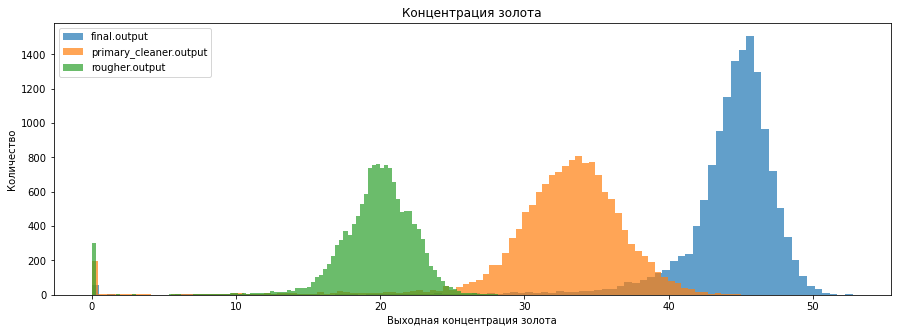

In [18]:
plt.figure(figsize=[15,5])
plt.title('Концентрация золота')
plt.hist(data_train['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=0.7)
plt.hist(data_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=0.7)
plt.hist(data_train['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=0.7)

plt.xlabel('Выходная концентрация золота')
plt.ylabel('Количество')
plt.legend(loc='upper left')
plt.show()

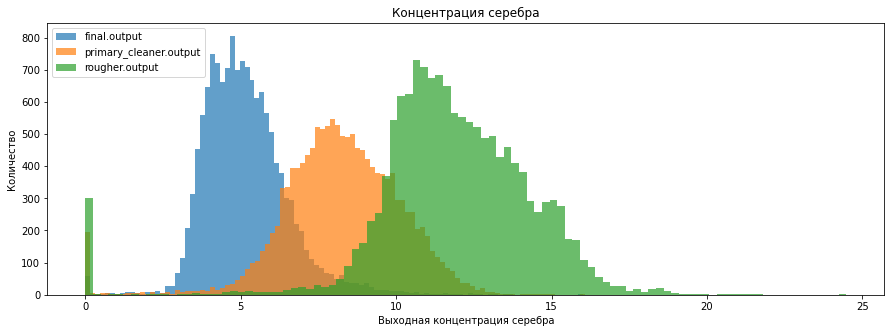

In [19]:
plt.figure(figsize=[15,5])
plt.title('Концентрация серебра')
plt.hist(data_train['final.output.concentrate_ag'], bins=100, label = 'final.output', alpha=0.7)
plt.hist(data_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output', alpha=0.7)
plt.hist(data_train['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output', alpha=0.7)

plt.xlabel('Выходная концентрация серебра')
plt.ylabel('Количество')
plt.legend(loc='upper left')
plt.show()

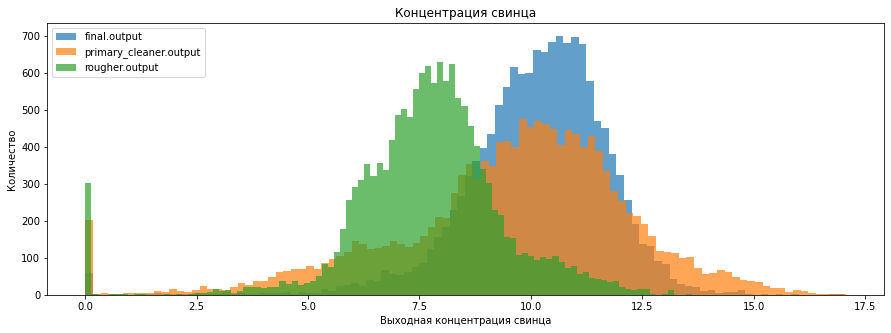

In [20]:
plt.figure(figsize=[15,5])
plt.title('Концентрация свинца')
plt.hist(data_train['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=0.7)
plt.hist(data_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=0.7)
plt.hist(data_train['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=0.7)

plt.xlabel('Выходная концентрация свинца')
plt.ylabel('Количество')
plt.legend(loc='upper left')
plt.show()

### 2.2 Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной

Средний размер гранулы на тестовой выборке:  55.95
Средний размер гранулы на тренировочной выборке:  60.24


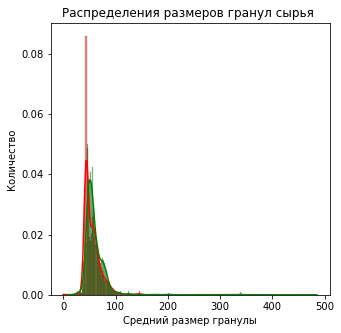

In [21]:
print('Средний размер гранулы на тестовой выборке: {: 0.2f}'.format(data_test['rougher.input.feed_size'].mean()))
print('Средний размер гранулы на тренировочной выборке: {: 0.2f}'.format(data_train['rougher.input.feed_size'].mean()))
plt.figure(figsize=(5,5))
plt.title('Распределения размеров гранул сырья ')
sns.histplot(data_test['rougher.input.feed_size'], kde=True, color='red', stat='density', alpha=0.5)
sns.histplot(data_train['rougher.input.feed_size'], kde=True, color='green', stat='density', alpha=0.5)

plt.xlabel('Средний размер гранулы')
plt.ylabel('Количество')
plt.show()

Мы видим, что среднии значения немного отличаются. В тренировочной выборке преобладают значения около 60, в то же время как в тестовой выборке достаточно большое количество объектов сосредаточены в районе 56.

### 2.3 Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

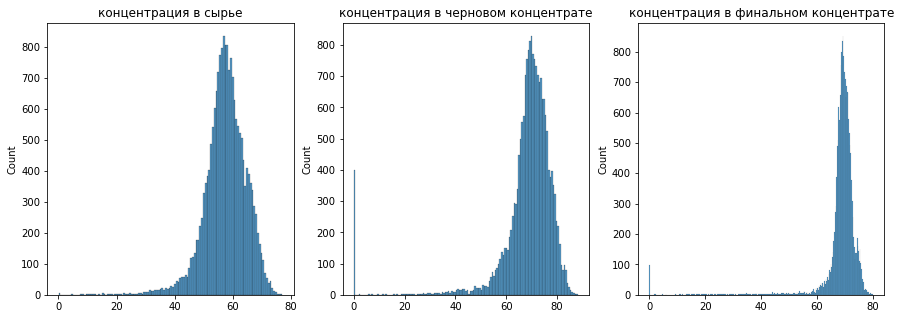

In [22]:
stages = [('rougher.input.feed_', 'концентрация в сырье'),
                        ('rougher.output.concentrate_', 'концентрация в черновом концентрате'), 
                        ('final.output.concentrate_', 'концентрация в финальном концентрате')]

fig, axs = plt.subplots(1, len(stages), figsize=(15, 5))

for stage, ax in zip(stages, axs):
    ax.set_title(stage[1])
    concentrat =  data_full[stage[0]+ 'ag'] + data_full[stage[0]+ 'au'] + data_full[stage[0]+ 'pb'] + data_full[stage[0]+ 'sol']
    sns.histplot(concentrat, ax=ax)   
plt.show()

Построив графики, мы видим, что в финальном концентрате содержание веществ в разы уменьшается, так же мы видимо выборосы около нулевых значений, скорре всего это связанно с неисправностью оборудования и такие значения мы удалим из выборки.

In [23]:
#print('data_train ##############################')
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_au"] < 1].index, axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_ag"] < 1].index, axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_pb"] < 1].index, axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_sol"] < 1].index, axis = 0)
#print()
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_au"] < 1].index, axis = 0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_ag"] < 1].index, axis = 0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_pb"] < 1].index, axis = 0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_sol"] < 1].index, axis = 0)
#print('data_full ##############################')
data_full = data_full.drop(index = data_full[data_full["rougher.output.concentrate_au"] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full["rougher.output.concentrate_ag"] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full["rougher.output.concentrate_pb"] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full["rougher.output.concentrate_sol"] < 1].index, axis = 0)
#print()
data_full = data_full.drop(index = data_full[data_full["final.output.concentrate_au"] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full["final.output.concentrate_ag"] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full["final.output.concentrate_pb"] < 1].index, axis = 0)
data_full = data_full.drop(index = data_full[data_full["final.output.concentrate_sol"] < 1].index, axis = 0)

Удалил выборосы.

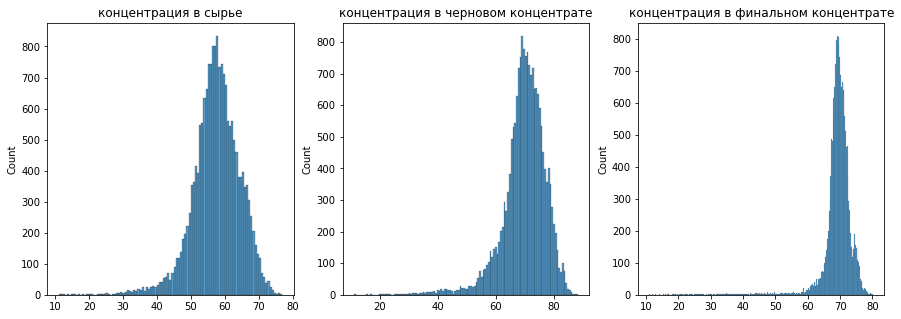

In [24]:
stages = [('rougher.input.feed_', 'концентрация в сырье'),
                        ('rougher.output.concentrate_', 'концентрация в черновом концентрате'), 
                        ('final.output.concentrate_', 'концентрация в финальном концентрате')]

fig, axs = plt.subplots(1, len(stages), figsize=(15, 5))

for stage, ax in zip(stages, axs):
    ax.set_title(stage[1])
    concentrat =  data_full[stage[0]+ 'ag'] + data_full[stage[0]+ 'au'] + data_full[stage[0]+ 'pb'] + data_full[stage[0]+ 'sol']
    sns.histplot(concentrat, ax=ax)   
plt.show()

Повторно построил графики, нулевые значения пропали, выбросов теперь нет на графике.

## 3. Модель

In [25]:
data_train = data_train.drop(columns = ['final.output.concentrate_ag', 'final.output.concentrate_pb',
            'final.output.concentrate_sol', 'final.output.concentrate_au',
            'final.output.tail_ag', 'final.output.tail_pb',
            'final.output.tail_sol', 'final.output.tail_au',
            'primary_cleaner.output.concentrate_ag',
            'primary_cleaner.output.concentrate_pb',
            'primary_cleaner.output.concentrate_sol',
            'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag',
            'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
            'primary_cleaner.output.tail_au',
            'rougher.calculation.sulfate_to_au_concentrate',
            'rougher.calculation.floatbank10_sulfate_to_au_feed',
            'rougher.calculation.floatbank11_sulfate_to_au_feed',
            'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
            'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
            'rougher.output.concentrate_au',
            'rougher.output.tail_ag', 'rougher.output.tail_pb',
            'rougher.output.tail_sol', 'rougher.output.tail_au',
            'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
            'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au'], axis =1)

Удалил из train признаки которых нет в test.

In [26]:
print(diff(data_train, data_test))

set()


Убедился, что в train не осталось лишних признаков.

In [27]:
print(data_train.shape)
print(data_test.shape)

(13678, 54)
(5290, 54)


По 54 признака в каждой выборке.

### 3.1 Напишите функцию для вычисления sMAPE

In [28]:
def smape(target_actual, target_predictions):
    a = np.abs(target_actual - target_predictions)
    b = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    return 1 / len(target_actual) * np.sum(a / b) * 100

In [29]:
def final_smape(rouger, final):
    return (0.25 * rouger + 0.75 * final)

Подготовил функцию для расчета sMAPE.

In [30]:
scorer = make_scorer(smape, greater_is_better=False)

Подготовил scorer.

### 3.2 Обучите разные модели и оцените их качество кросс-валидацией

In [31]:
#print('data_train ##############################')
target_train = data_train['rougher.output.recovery'] # выделил признак для обучающей выборки
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery'] , axis=1) # выделил целевой признак для обучающей
target_train_final = data_train['final.output.recovery'] # выделил признак для обучающей выборки
#print('data_test ##############################')
target_test = data_test['rougher.output.recovery'] # выделил признак для тестовой выборки
features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'] , axis=1) #выделил целевой признак для тестовой
target_test_final = data_test['final.output.recovery'] # выделил признак для тестовой выборки

Выделил признаки для train и test.

In [32]:
#print('data_train ##############################')
print('target_train', target_train.shape)
print('features_train', features_train.shape)
print('target_train_final', target_train_final.shape)
#print('data_test ##############################')
print('target_test', target_test.shape)
print('features_test', features_test.shape)
print('target_test_final', target_test_final.shape)

target_train (13678,)
features_train (13678, 52)
target_train_final (13678,)
target_test (5290,)
features_test (5290, 52)
target_test_final (5290,)


Проверил признаки для train и test.

In [33]:
%%time
model_1 = LinearRegression()
model_1.fit(features_train, target_train)
smape_1 = cross_val_score(model_1, features_train, target_train, cv=5, scoring=scorer).mean()
print('Значение sMAPE для LinearRegression: {: 0.2f}'.format(-smape_1))

Значение sMAPE для LinearRegression:  7.36
CPU times: total: 219 ms
Wall time: 105 ms


Обучил модель линейная регрессия на обучающей выборке.

In [34]:
%%time
model_2 = DecisionTreeRegressor(random_state=RANDOMSTATE)
model_2 = GridSearchCV(model_2, param_grid={'max_depth': range(1, 5)}, cv=5, scoring=scorer)
model_2.fit(features_train, target_train)
print('Значение sMAPE для DecisionTreeRegressor: {: 0.2f}'.format(-model_2.best_score_))

Значение sMAPE для DecisionTreeRegressor:  7.34
CPU times: total: 2.86 s
Wall time: 2.54 s


Обучил модель дерево решений на обучающей выборке.

In [35]:
%%time
model_3 = RandomForestRegressor(max_depth=2, random_state=RANDOMSTATE)
model_3 = GridSearchCV(model_3, param_grid={'max_depth': range(1, 5)}, cv=5, scoring=scorer)
model_3.fit(features_train, target_train)
print('Значение sMAPE для RandomForestRegressor: {: 0.2f}'.format(-model_3.best_score_))

Значение sMAPE для RandomForestRegressor:  6.64
CPU times: total: 2min 31s
Wall time: 2min 31s


Обучил модель случайный лес на обучающей выборке.

Я проверил три различные модели, лучшей моделью оказалась RandomForestRegressor.

### 3.3 Выберите лучшую модель и проверьте её на тестовой выборке

In [36]:
%%time
model_4 = RandomForestRegressor(max_depth=2, random_state=RANDOMSTATE) 
model_4.fit(features_train, target_train)
predictions_test = model_4.predict(features_test)
print('Значение sMAPE для тестовой выборки: {: 0.2f}'.format(smape(target_test, predictions_test)))

Значение sMAPE для тестовой выборки:  8.38
CPU times: total: 7.39 s
Wall time: 7.41 s


### 3.4 Тестирование DummyRegressor

In [37]:
%%time
model_5 = DummyRegressor(strategy='median').fit(features_train, target_train)
model_final = DummyRegressor(strategy='median').fit(features_train, target_train_final)

predictions = model_5.predict(features_test)
predictions_final = model_final.predict(features_test)

test = smape(target_test, predictions)
final_test = smape(target_test_final, predictions_final)
smape = final_smape(test, final_test)
print('Итоговое предсказание на тестовой выборке sMAPE с Dummy: {: 0.2f}'.format(smape))

Итоговое предсказание на тестовой выборке sMAPE с Dummy:  9.42
CPU times: total: 0 ns
Wall time: 4.01 ms


### 3.5 Опишите выводы

Проведя исследование на трех разных моделях, наилучший результат на обучающей выборке показала модель **RandomForestRegressor**, именно ее я выбрал для финальной проверке на тестовой выборке.  
Результат на обучающейся выборке результат **sMAPE** составил 6.6, на тестовой выборки результат **sMAPE** составил 8.4.  
Дополнительно я провел тестирование **DummyRegressor**, результат на тестовой выборке составил 9.42.